In [1]:
import numpy as np

In [2]:
from scipy.sparse import random

In [3]:
from scipy import stats

In [21]:
import matplotlib.pyplot as plt

In [47]:
from sklearn.preprocessing import normalize

In [231]:
import scipy.sparse as sps

In [550]:
from tqdm import tqdm_notebook

In [5]:
normal_rvs = stats.gaussian(25, loc=10).rvs

AttributeError: module 'scipy.stats' has no attribute 'gaussian'

# Uniformly distributed

In [23]:
test_matrix = random(100, 100, density=1)

(array([1027., 1006., 1026., 1001.,  958., 1039.,  962.,  987., 1007.,
         987.]),
 array([1.08962762e-04, 1.00067628e-01, 2.00026293e-01, 2.99984958e-01,
        3.99943623e-01, 4.99902288e-01, 5.99860953e-01, 6.99819618e-01,
        7.99778283e-01, 8.99736948e-01, 9.99695613e-01]),
 <a list of 10 Patch objects>)

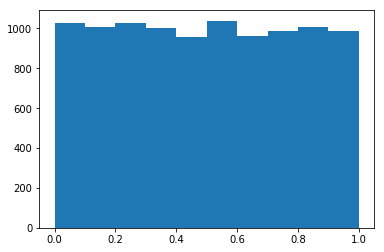

In [24]:
plt.hist(test_matrix.todense().reshape(-1).tolist())

# Normalized by rows

In [178]:
test_matrix = random(3, 4, density=1)

Rows - senders

Columns - receivers

In [179]:
test_matrix.todense()

matrix([[0.25215461, 0.23838465, 0.44311414, 0.95255086],
        [0.34754827, 0.27548035, 0.83081409, 0.99426295],
        [0.05545067, 0.04034874, 0.75318494, 0.62173256]])

In [180]:
test_matrix = normalize(test_matrix, norm='l1', axis=1)

In [181]:
test_matrix.todense()

matrix([[0.13368362, 0.12638326, 0.23492373, 0.50500939],
        [0.14196621, 0.11252796, 0.33937019, 0.40613564],
        [0.03770316, 0.02743474, 0.51212095, 0.42274115]])

# Multiplied by agent balances

In [182]:
test_matrix.todense()

matrix([[0.13368362, 0.12638326, 0.23492373, 0.50500939],
        [0.14196621, 0.11252796, 0.33937019, 0.40613564],
        [0.03770316, 0.02743474, 0.51212095, 0.42274115]])

In [183]:
balances = (np.random.rand(test_matrix.shape[0]) > 0.5).astype(float)

In [184]:
balances

array([0., 1., 0.])

In [185]:
test_matrix.T.multiply(balances).T.todense()

matrix([[0.        , 0.        , 0.        , 0.        ],
        [0.14196621, 0.11252796, 0.33937019, 0.40613564],
        [0.        , 0.        , 0.        , 0.        ]])

# Total outcomes and incomes

In [209]:
outcome = test_matrix.sum(axis=1).A1

In [210]:
outcome.shape

(3,)

In [207]:
income = test_matrix.sum(axis=0).A1

In [208]:
income.shape

(4,)

# Matrix element-wise multiplication for comission

In [219]:
test_matrix.multiply(test_matrix)

<3x4 sparse matrix of type '<class 'numpy.float64'>'
	with 12 stored elements in Compressed Sparse Row format>

In [239]:
def create_similar_random_matrix(coo_matrix):
    rows = coo_matrix.tocoo().row
    cols = coo_matrix.tocoo().col
    data = np.random.rand(len(rows))
    return sps.coo_matrix((data, (rows, cols)), shape=coo_matrix.shape)

In [241]:
create_similar_random_matrix(test_matrix).todense()

matrix([[0.70204837, 0.45630783, 0.09836035, 0.52272971],
        [0.80085677, 0.89843618, 0.29084382, 0.07047528],
        [0.14506342, 0.98897675, 0.80284466, 0.53619701]])

# Random transactions (+ comission)

In [624]:
def do_random_transactions(balances, density=1, max_transaction_rate=0.01, max_comission_rate=0.1):
    agents_size = balances.shape[0]
    
    random_max_transaction_rates = max_transaction_rate * np.random.rand(balances.shape[0])
    random_total_transaction_rates = random(agents_size, agents_size, density=density)
    normalized_random_total_transaction_rates =  normalize(random_total_transaction_rates, norm='l1', axis=1)
    total_transaction_amounts = normalized_random_total_transaction_rates.T.multiply(random_max_transaction_rates * balances).T
    
    transactions_sended = (total_transaction_amounts > 0)
    random_comission_rates = max_comission_rate * create_similar_random_matrix(transactions_sended)
    comission_amounts = total_transaction_amounts.multiply(random_comission_rates)
    transaction_amounts = total_transaction_amounts - comission_amounts
    
    income = transaction_amounts.sum(axis=0).A1
    outcome = transaction_amounts.sum(axis=1).A1 + comission_amounts.sum(axis=1).A1
    return balances + income - outcome, comission_amounts.sum()

In [631]:
SIZE = 1000000

In [632]:
balances = np.random.rand(SIZE)

In [633]:
density = 1 / ((SIZE * SIZE) / (1 * 1024 * 1024))

In [634]:
density

1.048576e-06

In [642]:
balances, _ = calculate_new_balances(balances, density=density)

In [643]:
balances

array([0.49689349, 0.40562219, 0.73161588, ..., 0.74655182, 0.43261747,
       0.22789469])